<a href="https://colab.research.google.com/github/Shakti242/API-Route/blob/main/yolo_env.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!git clone https://github.com/snehitvaddi/YOLOv3-Cloud-Based-Fire-Detection.git

Cloning into 'YOLOv3-Cloud-Based-Fire-Detection'...
remote: Enumerating objects: 178, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 178 (delta 19), reused 10 (delta 10), pack-reused 156 (from 1)
Receiving objects: 100% (178/178), 33.99 MiB | 31.47 MiB/s, done.
Resolving deltas: 100% (76/76), done.


In [5]:
!git clone https://github.com/AlexeyAB/darknet

fatal: destination path 'darknet' already exists and is not an empty directory.


In [6]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

[Errno 20] Not a directory: 'darknet'
/content/darknet


In [7]:
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0


In [8]:
!make

chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -rdynamic -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:945:23: warning: variable ‘rgb’ set but not used []8;;https://gcc.gnu.org/onlinedocs/gcc/Warning-Options.html#index-Wunused-but-set-variable-Wunused-but-set-variable]8;;]
  945 |                 float rgb[3];
      |                       ^~~
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1443:14: warning: unused variable ‘buff’ []8;;https://gcc.gnu.org/onlinedocs/gcc/Warn

In [9]:
!wget https://pjreddie.com/media/files/yolov3.weights

--2024-09-12 19:21:49--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  27.7MB/s    in 11s     

2024-09-12 19:22:01 (21.4 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [10]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload()
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file
def download(path):
  from google.colab import files
  files.download(path)

In [11]:
# Install CUDA 11.0 (or the version compatible with your GPU)
!apt-get update
!apt-get install -y --no-install-recommends cuda-11-0

# Set the CUDA environment variables
import os
os.environ['PATH'] += ':/usr/local/cuda-11.0/bin'
os.environ['LD_LIBRARY_PATH'] += ':/usr/local/cuda-11.0/lib64'

# Verify CUDA installation
!nvcc --version



Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Ign:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:11 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,149 kB]
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:13 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:14 http://security

In [12]:
import torch
print(torch.cuda.is_available())


False


In [13]:
!pip3 install labelImg
!labelImg
!labelImg [IMAGE_PATH] [PRE-DEFINED CLASS FILE]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.7/247.7 kB 11.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 53.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.8/59.8 MB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.5/270.5 kB 16.6 MB/s eta 0:00:00
  Created wheel for labelImg: filename=labelImg-1.8.6-py2.py3-none-any.whl size=261520 sha256=2cb644170ebd4fd90d20fd701b2db45d79733af78b5228ff27abd2fced547c31
  Stored in directory: /root/.cache/pip/wheels/d9/f0/1e/74c509495458cad13a0fda23fe605e643177625cf2b5c17b34
Successfully built labelImg
qt.qpa.plugin: Could not load the Qt platform plugin "xcb" in "" even though it was found.
This application failed to start because no Qt platform plugin could be initialized. Reinstalling the application may fix this problem.

Available platform plugins are: linuxfb, minimal, offscreen, vnc, webgl, xcb.

qt.qpa.plugin: Could not load the Qt p

In [14]:
!brew install python3
!pip3 install pipenv
!pipenv run pip install pyqt5==5.15.2 lxml
!pipenv run make qt5py3
!pipenv run python3 labelImg.py


/bin/bash: line 1: brew: command not found
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 20.9 MB/s eta 0:00:00
Creating a virtualenv for this project...
Pipfile: /content/darknet/Pipfile
Using default python from /usr/bin/python3 (3.10.12) to create virtualenv...
⠼ Creating virtual environment...created virtual environment CPython3.10.12.final.0-64 in 2876ms
  creator CPython3Posix(dest=/root/.local/share/virtualenvs/darknet-X2L1ADoM, clear=False, no_vcs_ignore=False, global=False)
  seeder FromAppData(download=False, pip=bundle, setuptools=bundle, wheel=bundle, via=copy, app_data_dir=/root/.local/share/virtualenv)
    added seed packages: pip==24.2, setuptools==74.1.2, wheel==0.44.0
  activators BashActivator,CShellActivator,FishActivator,NushellActivator,PowerShellActivator,PythonActivator

✔ Successfully created virtua

In [15]:
!git clone https://github.com/AlexeyAB/darknet.git


fatal: destination path 'darknet' already exists and is not an empty directory.


In [16]:
%cd darknet


[Errno 20] Not a directory: 'darknet'
/content/darknet


In [17]:
!sed -i 's/GPU=1/GPU=0/' Makefile
!sed -i 's/CUDNN=1/CUDNN=0/' Makefile


In [18]:
!make


chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -rdynamic -Ofast -DOPENCV -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:945:23: warning: variable ‘rgb’ set but not used []8;;https://gcc.gnu.org/onlinedocs/gcc/Warning-Options.html#index-Wunused-but-set-variable-Wunused-but-set-variable]8;;]
  945 |                 float rgb[3];
      |                       ^~~
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1443:14: warning: unused variable ‘buff’ []8;;https://gcc.gnu.org/onlinedocs/gcc/Warning-Options.html#index-Wunused-variable-Wunused-variable]8;;]
 1443 |         c

In [19]:
!ls -l darknet


-rwxr-xr-x 1 root root 1578320 Sep 12 19:24 darknet


In [20]:
!./darknet detect cfg/yolov3.cfg yolov3.weights data/person.jpg


 GPU isn't used 
 OpenCV version: 4.5.4
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
   9 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
  10 conv    128       3 x 3/ 1    104 x 104 x  

In [21]:
!wget https://pjreddie.com/media/files/yolov3.weights


--2024-09-12 19:24:51--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights.1’

yolov3.weights.1    100%[===================>] 236.52M  1.52MB/s    in 33s     

2024-09-12 19:25:24 (7.23 MB/s) - ‘yolov3.weights.1’ saved [248007048/248007048]



In [22]:
!mv yolov3.weights darknet/


mv: failed to access 'darknet/': Not a directory


In [23]:
!!ls -l



['total 486304',
 'drwxr-xr-x 5 root root      4096 Sep 12 19:16 3rdparty',
 'drwxr-xr-x 2 root root      4096 Sep 12 19:17 backup',
 'drwxr-xr-x 3 root root      4096 Sep 12 19:16 build',
 '-rwxr-xr-x 1 root root     44955 Sep 12 19:16 build.ps1',
 'drwxr-xr-x 3 root root      4096 Sep 12 19:16 cfg',
 'drwxr-xr-x 3 root root      4096 Sep 12 19:16 cmake',
 '-rw-r--r-- 1 root root     29835 Sep 12 19:16 CMakeLists.txt',
 '-rwxr-xr-x 1 root root   1578320 Sep 12 19:24 darknet',
 '-rw-r--r-- 1 root root      1493 Sep 12 19:16 DarknetConfig.cmake.in',
 '-rw-r--r-- 1 root root      9559 Sep 12 19:16 darknet_images.py',
 '-rw-r--r-- 1 root root     11106 Sep 12 19:16 darknet.py',
 '-rw-r--r-- 1 root root      8000 Sep 12 19:16 darknet_video.py',
 'drwxr-xr-x 3 root root      4096 Sep 12 19:16 data',
 '-rw-r--r-- 1 root root       366 Sep 12 19:16 docker-compose.yml',
 '-rw-r--r-- 1 root root       774 Sep 12 19:16 Dockerfile.cpu',
 '-rw-r--r-- 1 root root       834 Sep 12 19:16 Dockerfile.g

In [24]:
!./darknet detect cfg/yolov3.cfg yolov3.weights data/person.jpg


 GPU isn't used 
 OpenCV version: 4.5.4
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
   9 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
  10 conv    128       3 x 3/ 1    104 x 104 x  

# New section

In [25]:
pip install opencv-python-headless

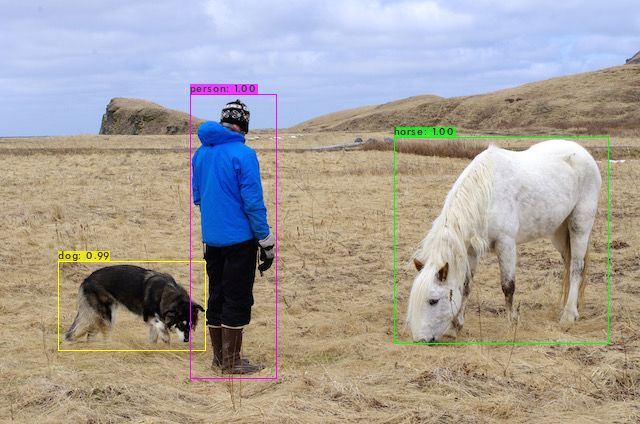

In [26]:
import cv2
from google.colab.patches import cv2_imshow

# Load the image
image = cv2.imread('predictions.jpg')

# Display the image
cv2_imshow(image)



In [27]:
# look we can run another detection!
!./darknet detect cfg/yolov3.cfg yolov3.weights data/dog.jpg


 GPU isn't used 
 OpenCV version: 4.5.4
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
   9 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
  10 conv    128       3 x 3/ 1    104 x 104 x  

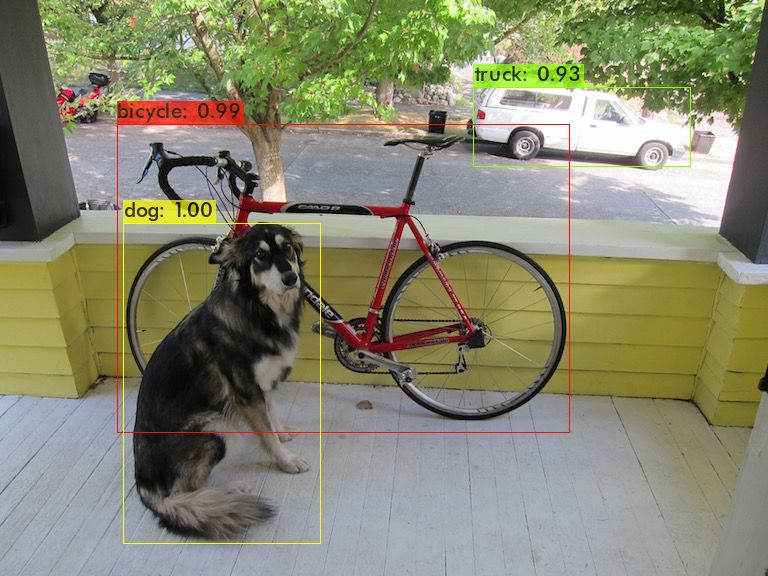

In [28]:
from IPython.display import Image, display

# Display the image
display(Image(filename='predictions.jpg'))


In [29]:
!./darknet detect cfg/yolov3.cfg yolov3.weights data/dog.jpg


 GPU isn't used 
 OpenCV version: 4.5.4
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
   9 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
  10 conv    128       3 x 3/ 1    104 x 104 x  

In [30]:
%cd /content/drive/MyDrive


/content/drive/MyDrive


In [31]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [33]:
!ls /content


shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
darknet  drive	sample_data


In [34]:
!unzip /content/Dataset.zip -d /content/Dataset


shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
unzip:  cannot find or open /content/Dataset.zip, /content/Dataset.zip.zip or /content/Dataset.zip.ZIP.


In [35]:
# For the Testing directory
!ls Testing

# For the Training directory
!ls Training


shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
ls: cannot access 'Testing': Transport endpoint is not connected
shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
ls: cannot access 'Training': Transport endpoint is not connected


In [ ]:
# Path to the fire directory
fire_dir = '/content/Dataset/Forest Fire Dataset/Training/fire'
print(os.listdir(fire_dir))  # Should list all files in the fire directory


In [36]:
import cv2
from matplotlib import pyplot as plt

# Correct image path
image_path = '/content/Dataset/Forest Fire Dataset/Training/fire/fire_0023.jpg'

# Load the image using OpenCV
image = cv2.imread(image_path)

# Check if the image is loaded successfully
if image is None:
    print("Error loading image")
else:
    # Convert the image from BGR to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the image
    plt.imshow(image_rgb)
    plt.axis('off')  # Hide axes
    plt.show()


Error loading image


In [ ]:
import os
training_dir = '/content/Dataset/Forest Fire Dataset/Training'
print(os.listdir(training_dir))  # List files and folders in the Training directory


In [37]:
%cd /content/Dataset/Forest Fire Dataset/Darknet


[Errno 2] No such file or directory: '/content/Dataset/Forest Fire Dataset/Darknet'
/content/drive/MyDrive


In [ ]:
import os

dataset_dir = '/content/Dataset/Forest Fire Dataset'
print(os.listdir(dataset_dir))  # List all directories and files in this path


In [38]:
import os

darknet_dir = '/content/darknet'
print(os.listdir(darknet_dir))  # List files in the Darknet directory


['LICENSE', 'yolov3.weights', 'darknet_video.py', '.gitignore', 'vcpkg.json', '.git', '3rdparty', 'README.md', 'backup', 'Pipfile', 'yolov3.weights.1', 'data', 'build', 'video_yolov3.sh', 'darknet_images.py', 'video_yolov4.sh', 'Makefile', 'image_yolov3.sh', 'net_cam_v3.sh', 'include', 'src', '.circleci', 'scripts', 'net_cam_v4.sh', '.github', 'darknet.py', 'vcpkg.json.opencv23', 'Dockerfile.gpu', 'predictions.jpg', 'YOLOv3-Cloud-Based-Fire-Detection', 'cmake', 'CMakeLists.txt', 'results', 'build.ps1', 'cfg', 'docker-compose.yml', 'DarknetConfig.cmake.in', 'Dockerfile.cpu', 'package.xml', 'obj', 'json_mjpeg_streams.sh', 'image_yolov4.sh', 'darknet']


In [39]:
src_dir = os.path.join(darknet_dir, 'src')
print(os.listdir(src_dir))  # List files in the src directory


['route_layer.c', 'version.h.in', 'parser.c', 'convolutional_layer.h', 'region_layer.h', 'route_layer.h', 'box.h', 'upsample_layer.h', 'maxpool_layer_kernels.cu', 'dark_cuda.c', 'layer.h', 'data.c', 'network.h', 'network.c', 'activation_layer.c', 'swag.c', 'local_layer.c', 'batchnorm_layer.c', 'darknet.c', 'option_list.h', 'darkunistd.h', 'cifar.c', 'deconvolutional_kernels.cu', 'list.h', 'crnn_layer.h', 'softmax_layer.h', 'image_opencv.cpp', 'rnn_layer.h', 'gemm.c', 'demo.c', 'detection_layer.c', 'blas_kernels.cu', 'detection_layer.h', 'crop_layer.c', 'demo.h', 'rnn.c', 'nightmare.c', 'dark_cuda.h', 'avgpool_layer_kernels.cu', 'activations.h', 'conv_lstm_layer.h', 'dropout_layer.c', 'tag.c', 'rnn_layer.c', 'scale_channels_layer.c', 'im2col.h', 'crnn_layer.c', 'activation_kernels.cu', 'col2im.h', 'crop_layer_kernels.cu', 'list.c', 'parser.h', 'avgpool_layer.c', 'reorg_layer.h', 'normalization_layer.h', 'cost_layer.c', 'yolo.c', 'http_stream.h', 'box.c', 'conv_lstm_layer.c', 'gru_layer.

In [40]:
# Navigate to the darknet directory
%cd /content/darknet

# Run the make command to build darknet
!make


/content/darknet
chmod +x *.sh


In [41]:
!ls


3rdparty		darknet.py	       LICENSE		scripts
backup			darknet_video.py       Makefile		src
build			data		       net_cam_v3.sh	vcpkg.json
build.ps1		docker-compose.yml     net_cam_v4.sh	vcpkg.json.opencv23
cfg			Dockerfile.cpu	       obj		video_yolov3.sh
cmake			Dockerfile.gpu	       package.xml	video_yolov4.sh
CMakeLists.txt		image_yolov3.sh        Pipfile		YOLOv3-Cloud-Based-Fire-Detection
darknet			image_yolov4.sh        predictions.jpg	yolov3.weights
DarknetConfig.cmake.in	include		       README.md	yolov3.weights.1
darknet_images.py	json_mjpeg_streams.sh  results


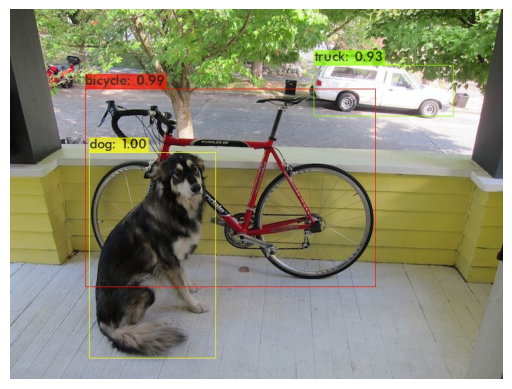

In [42]:
from PIL import Image
import matplotlib.pyplot as plt

# Load and display the image
image_path = 'predictions.jpg'
image = Image.open(image_path)

plt.imshow(image)
plt.axis('off')  # Hide axis
plt.show()


In [43]:
!./darknet detect cfg/yolov3.cfg yolov3.weights fre1.jpg


 GPU isn't used 
 OpenCV version: 4.5.4
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
   9 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
  10 conv    128       3 x 3/ 1    104 x 104 x  

In [44]:
!./darknet detector train /content/Dataset/Forest Fire Dataset/fire.data /content/Dataset/Forest Fire Dataset/yolov3.cfg yolov3.weights


 GPU isn't used 
 OpenCV version: 4.5.4
Couldn't open file: /content/Dataset/Forest


In [45]:
# List contents of the dataset directory
!ls /content/Dataset/Forest\ Fire\ Dataset/

# List contents of the darknet directory
!ls /content/darknet/


ls: cannot access '/content/Dataset/Forest Fire Dataset/': No such file or directory
3rdparty		docker-compose.yml     predictions.jpg
backup			Dockerfile.cpu	       README.md
bad.list		Dockerfile.gpu	       results
build			image_yolov3.sh        scripts
build.ps1		image_yolov4.sh        src
cfg			include		       vcpkg.json
cmake			json_mjpeg_streams.sh  vcpkg.json.opencv23
CMakeLists.txt		LICENSE		       video_yolov3.sh
darknet			Makefile	       video_yolov4.sh
DarknetConfig.cmake.in	net_cam_v3.sh	       YOLOv3-Cloud-Based-Fire-Detection
darknet_images.py	net_cam_v4.sh	       yolov3.weights
darknet.py		obj		       yolov3.weights.1
darknet_video.py	package.xml
data			Pipfile


In [46]:
!ls /content/Dataset/Forest\ Fire\ Dataset/


ls: cannot access '/content/Dataset/Forest Fire Dataset/': No such file or directory


In [47]:
import os

# Ensure the directory exists
directory_path = "/content/Dataset/Forest Fire Dataset/"
os.makedirs(directory_path, exist_ok=True)

# Create the fire.data file
fire_data_content = """
classes= 2
train  = /content/Dataset/Forest Fire Dataset/Training.txt
valid  = /content/Dataset/Forest Fire Dataset/Testing.txt
names  = /content/Dataset/Forest Fire Dataset/obj.names
backup = /content/darknet/backup/
"""

with open(os.path.join(directory_path, "fire.data"), "w") as file:
    file.write(fire_data_content)


In [48]:
import os

dataset_dir = "/content/Dataset/Forest Fire Dataset"
print(os.listdir(dataset_dir))  # List contents of the Forest Fire Dataset directory


['fire.data']


In [49]:
import cv2
from google.colab.patches import cv2_imshow

image_path = 'fre1.jpg'
image = cv2.imread(image_path)
!cv2_imshow(image)


/bin/bash: -c: line 1: syntax error near unexpected token `image'
/bin/bash: -c: line 1: `cv2_imshow(image)'


In [50]:
!./darknet detect cfg/yolov3.cfg yolov3.weights fre1.jpg


 GPU isn't used 
 OpenCV version: 4.5.4
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
   9 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
  10 conv    128       3 x 3/ 1    104 x 104 x  

In [51]:
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

/mydrive


In [52]:
%cd ..

/content


In [53]:
!cd ..


In [54]:
!cp /content/drive/My\ Drive/Fire.jpg /content/darknet/



In [55]:
%cd /content/darknet


/content/darknet


In [56]:
from IPython.display import Image
Image('/content/darknet/predictions.jpg')


In [57]:
!./darknet detect cfg/yolov3.cfg yolov3.weights /content/darknet/Fire.jpg


 GPU isn't used 
 OpenCV version: 4.5.4
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
   9 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
  10 conv    128       3 x 3/ 1    104 x 104 x  

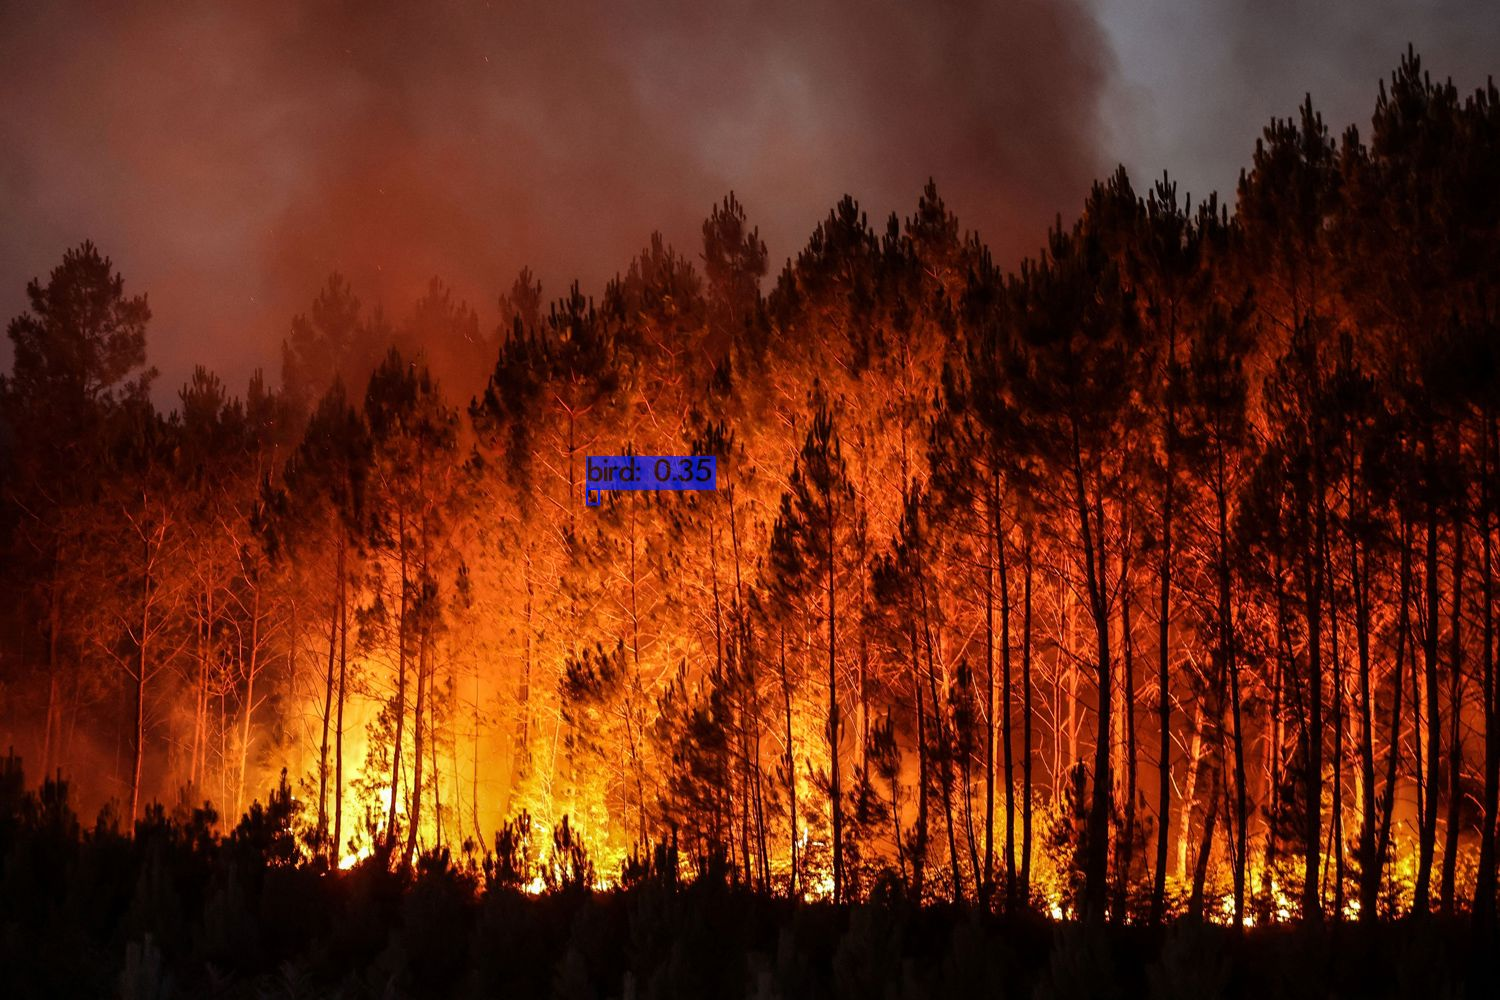

In [58]:
from IPython.display import Image, display
display(Image(filename='/content/darknet/predictions.jpg'))


In [59]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  0


In [60]:
import tensorflow as tf

with tf.device('/GPU:0'):
    a = tf.random.normal([10000, 10000])
    b = tf.random.normal([10000, 10000])
    c = tf.matmul(a, b)
print("Computation done.")


Computation done.


In [61]:
!./darknet detect cfg/yolov3.cfg yolov3.weights /content/darknet/Fire.jpg


 GPU isn't used 
 OpenCV version: 4.5.4
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
   9 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
  10 conv    128       3 x 3/ 1    104 x 104 x  

In [62]:
import os
import glob

# Path to your annotations
annotations_path = 'path/to/annotations/*.txt'

# Get the list of files matching the pattern
files = glob.glob(annotations_path)

if not files:
    print("No files found. Please check the annotations path.")
else:
    print(f"Found {len(files)} annotation files.")
    for file in files:
        print(f"Reading file: {file}")
        with open(file, 'r') as f:
            lines = f.readlines()
            if not lines:
                print(f"No data found in file: {file}")
            else:
                for line in lines:
                    print(line.strip())

            print(line.strip())


No files found. Please check the annotations path.


In [63]:
!cp Fire.jpg /content/drive/My\ Drive/Fire.jpg


In [64]:
!git clone https://github.com/theAIGuysCode/OIDv4_ToolKit.git


Cloning into 'OIDv4_ToolKit'...
remote: Enumerating objects: 444, done.
remote: Total 444 (delta 0), reused 0 (delta 0), pack-reused 444 (from 1)
Receiving objects: 100% (444/444), 34.09 MiB | 32.50 MiB/s, done.
Resolving deltas: 100% (157/157), done.


In [65]:
%cd OIDv4_ToolKit
!pip install -r requirements.txt


/content/darknet/OIDv4_ToolKit
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 60.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 64.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 548.2/548.2 kB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 5.1 MB/s eta 0:00:00
  Attempting uninstall: rsa
    Found existing installation: rsa 4.9
    Uninstalling rsa-4.9:
      Successfully uninstalled rsa-4.9
  Attempting uninstall: docutils
    Found existing installation: docutils 0.18.1
    Uninstalling docutils-0.18.1:
      Successfully uninstalled docutils-0.18.1


In [66]:
!git clone https://github.com/theAIGuysCode/OIDv4_ToolKit.git


Cloning into 'OIDv4_ToolKit'...
remote: Enumerating objects: 444, done.
remote: Total 444 (delta 0), reused 0 (delta 0), pack-reused 444 (from 1)
Receiving objects: 100% (444/444), 34.09 MiB | 12.94 MiB/s, done.
Resolving deltas: 100% (157/157), done.


In [67]:
%cd OIDv4_ToolKit


/content/darknet/OIDv4_ToolKit/OIDv4_ToolKit


In [68]:
!ls


classes.txt  convert_annotations.py  images  LICENSE  main.py  modules	README.md  requirements.txt


In [69]:
!mkdir -p OID/Dataset


In [70]:
def convert(filename, output_dir):
    with open(filename, 'r') as file:
        lines = file.readlines()

    for line in lines:
        parts = line.split()
        # Assuming the format: class x_min y_min x_max y_max
        class_id, x_min, y_min, x_max, y_max = map(float, parts)

        # Convert to YOLO format
        x_center = (x_min + x_max) / 2
        y_center = (y_min + y_max) / 2
        width = x_max - x_min
        height = y_max - y_min

        # Normalize coordinates
        x_center /= image_width
        y_center /= image_height
        width /= image_width
        height /= image_height

        # Save in YOLO format
        with open(os.path.join(output_dir, 'converted_labels.txt'), 'a') as out_file:
            out_file.write(f"{class_id} {x_center} {y_center} {width} {height}\n")


In [71]:
import os

# Define the output directory
output_dir = "OID/YOLO_Labels"

# Check if the directory exists, and create it if it doesn't
if not os.path.exists(output_dir):
    os.makedirs(output_dir)



In [72]:
# Python code to create directories
import os

output_dir = "OID/YOLO_Labels"

# Check if the directory exists and create it if it doesn't
if not os.path.exists(output_dir):
    os.makedirs(output_dir)


In [73]:
# Shell command to list contents of the directory (optional, just to check)
!ls OID/YOLO_Labels


In [74]:
import os

output_dir = "OID/YOLO_Labels"

# Create the directory if it does not exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

print(f"Directory {output_dir} is ready.")


Directory OID/YOLO_Labels is ready.


In [75]:
# Create the directory if it does not exist
!mkdir -p OID/YOLO_Labels


In [76]:
!pwd  # Print working directory
!ls   # List files in the current directory


/content/darknet/OIDv4_ToolKit/OIDv4_ToolKit
classes.txt		images	 main.py  OID	     requirements.txt
convert_annotations.py	LICENSE  modules  README.md


In [77]:
%cd OID
!ls  # List files in the OID directory


/content/darknet/OIDv4_ToolKit/OIDv4_ToolKit/OID
Dataset  YOLO_Labels


In [78]:
%cd YOLO_Labels
!ls  # List files in the YOLO_Labels directory


/content/darknet/OIDv4_ToolKit/OIDv4_ToolKit/OID/YOLO_Labels


In [79]:
%cd /content
!rm -rf OIDv4_ToolKit  # Remove the existing directory if it exists
!git clone https://github.com/theAIGuysCode/OIDv4_ToolKit.git
%cd OIDv4_ToolKit
!ls  # List files to confirm the script is present


/content
Cloning into 'OIDv4_ToolKit'...
remote: Enumerating objects: 444, done.
remote: Total 444 (delta 0), reused 0 (delta 0), pack-reused 444 (from 1)
Receiving objects: 100% (444/444), 34.09 MiB | 8.06 MiB/s, done.
Resolving deltas: 100% (157/157), done.
/content/OIDv4_ToolKit
classes.txt  convert_annotations.py  images  LICENSE  main.py  modules	README.md  requirements.txt


In [80]:
!ls  # List files to find the script


classes.txt  convert_annotations.py  images  LICENSE  main.py  modules	README.md  requirements.txt


In [81]:
!cat /content/OIDv4_ToolKit/convert_annotations.py


import os
import cv2
import numpy as np
from tqdm import tqdm
import argparse
import fileinput

# function that turns XMin, YMin, XMax, YMax coordinates to normalized yolo format
def convert(filename_str, coords):
    os.chdir("..")
    image = cv2.imread(filename_str + ".jpg")
    coords[2] -= coords[0]
    coords[3] -= coords[1]
    x_diff = int(coords[2]/2)
    y_diff = int(coords[3]/2)
    coords[0] = coords[0]+x_diff
    coords[1] = coords[1]+y_diff
    coords[0] /= int(image.shape[1])
    coords[1] /= int(image.shape[0])
    coords[2] /= int(image.shape[1])
    coords[3] /= int(image.shape[0])
    os.chdir("Label")
    return coords

ROOT_DIR = os.getcwd()

# create dict to map class names to numbers for yolo
classes = {}
with open("classes.txt", "r") as myFile:
    for num, line in enumerate(myFile, 0):
        line = line.rstrip("\n")
        classes[line] = num
    myFile.close()
# step into dataset directory
os.chdir(os.path.join("OID", "Dataset"))
DIRS = os.listdir(os.getcwd

Directories in /content/OID:


FileNotFoundError: [Errno 2] No such file or directory: '/content/OID'

In [83]:
!pip install kaggle


In [84]:
# Download the dataset
!kaggle datasets download -d elmadafri/the-wildfire-dataset


Dataset URL: https://www.kaggle.com/datasets/elmadafri/the-wildfire-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
100% 9.93G/9.94G [03:03<00:00, 87.5MB/s]
100% 9.94G/9.94G [03:03<00:00, 58.1MB/s]


In [85]:
!unzip the-wildfire-dataset.zip -d /content/wildfire-dataset


Archive:  the-wildfire-dataset.zip
  inflating: /content/wildfire-dataset/the_wildfire_dataset_2n_version/test/fire/19196558588_267f24b847_o.jpg  
  inflating: /content/wildfire-dataset/the_wildfire_dataset_2n_version/test/fire/20960888741_8c4be2c1df_o.jpg  
  inflating: /content/wildfire-dataset/the_wildfire_dataset_2n_version/test/fire/26131736898_9e6a8cd68f_o.jpg  
  inflating: /content/wildfire-dataset/the_wildfire_dataset_2n_version/test/fire/26549039025_b4cce14ec7_o.jpg  
  inflating: /content/wildfire-dataset/the_wildfire_dataset_2n_version/test/fire/27002088114_aa5cc7f353_o.jpg  
  inflating: /content/wildfire-dataset/the_wildfire_dataset_2n_version/test/fire/27335331950_39b376eddd_o.jpg  
  inflating: /content/wildfire-dataset/the_wildfire_dataset_2n_version/test/fire/27389369514_cd30397ac2_o.jpg  
  inflating: /content/wildfire-dataset/the_wildfire_dataset_2n_version/test/fire/27951228213_2dd961ac1f_o.jpg  
  inflating: /content/wildfire-dataset/the_wildfire_dataset_2n_versio

In [86]:
os.makedirs('/content/OID/YOLO_Labels', exist_ok=True)



In [89]:
import os
import cv2
import numpy as np
from tqdm import tqdm
import argparse

# Function to convert coordinates to YOLO format
def convert(filename_str, coords):
    image = cv2.imread(filename_str + ".jpg")
    coords[2] -= coords[0]
    coords[3] -= coords[1]
    x_diff = int(coords[2]/2)
    y_diff = int(coords[3]/2)
    coords[0] = coords[0]+x_diff
    coords[1] = coords[1]+y_diff
    coords[0] /= int(image.shape[1])
    coords[1] /= int(image.shape[0])
    coords[2] /= int(image.shape[1])
    coords[3] /= int(image.shape[0])
    return coords

# Define the root directory
ROOT_DIR = os.getcwd()

# Load classes
classes = {}
with open("classes.txt", "r") as myFile:
    for num, line in enumerate(myFile, 0):
        line = line.rstrip("\n")
        classes[line] = num

# Process dataset
dataset_dir = 'Dataset'  # Adjust this if your dataset is in a different folder
os.chdir(dataset_dir)
DIRS = os.listdir(os.getcwd())

for DIR in DIRS:
    if os.path.isdir(DIR):
        os.chdir(DIR)
        CLASS_DIRS = os.listdir(os.getcwd())
        for CLASS_DIR in CLASS_DIRS:
            if os.path.isdir(CLASS_DIR):
                os.chdir(CLASS_DIR)
                os.chdir("Label")

                for filename in tqdm(os.listdir(os.getcwd())):
                    if filename.endswith(".txt"):
                        annotations = []
                        with open(filename) as f:
                            for line in f:
                                for class_type in classes:
                                    line = line.replace(class_type, str(classes.get(class_type)))
                                labels = line.split()
                                coords = np.asarray([float(labels[1]), float(labels[2]), float(labels[3]), float(labels[4])])
                                coords = convert(filename.split(".")[0], coords)
                                labels[1], labels[2], labels[3], labels[4] = coords[0], coords[1], coords[2], coords[3]
                                newline = " ".join(map(str, labels))
                                annotations.append(newline)
                            f.close()
                        os.chdir("..")
                        with open(filename, "w") as outfile:
                            for line in annotations:
                                outfile.write(line + "\n")
                            outfile.close()
                        os.chdir("Label")
                os.chdir("..")
                os.chdir("..")
        os.chdir("..")


FileNotFoundError: [Errno 2] No such file or directory: 'Dataset'

In [90]:
!ls /content/OIDv4_ToolKit


classes.txt		images	 main.py  README.md	    the-wildfire-dataset.zip
convert_annotations.py	LICENSE  modules  requirements.txt


In [91]:
!pwd  # Print working directory
!ls   # List files in the current directory


/content/OIDv4_ToolKit
classes.txt		images	 main.py  README.md	    the-wildfire-dataset.zip
convert_annotations.py	LICENSE  modules  requirements.txt


In [92]:
%cd /content/OIDv4_ToolKit


/content/OIDv4_ToolKit


In [93]:
!ls


classes.txt		images	 main.py  README.md	    the-wildfire-dataset.zip
convert_annotations.py	LICENSE  modules  requirements.txt


In [94]:
# Define sample class names
classes = ["fire", "no_fire"]

# Write to classes.txt
with open("/content/OIDv4_ToolKit/classes.txt", "w") as file:
    for i, cls in enumerate(classes):
        file.write(f"{cls}\n")


In [95]:
# Define the class names
classes_content = "fire\nno_fire"

# Create and write to classes.txt
with open('/content/OIDv4_ToolKit/classes.txt', 'w') as file:
    file.write(classes_content)


In [96]:
# Check if the file exists after creation
print("Classes file exists after creation:", os.path.isfile("/content/OIDv4_ToolKit/classes.txt"))


Classes file exists after creation: True


In [97]:
import os
import cv2
import numpy as np
from tqdm import tqdm

# Function to convert XMin, YMin, XMax, YMax coordinates to normalized YOLO format
def convert(filename_str, coords):
    image = cv2.imread(filename_str + ".jpg")
    coords[2] -= coords[0]
    coords[3] -= coords[1]
    x_diff = int(coords[2] / 2)
    y_diff = int(coords[3] / 2)
    coords[0] = coords[0] + x_diff
    coords[1] = coords[1] + y_diff
    coords[0] /= int(image.shape[1])
    coords[1] /= int(image.shape[0])
    coords[2] /= int(image.shape[1])
    coords[3] /= int(image.shape[0])
    return coords

# Set root directory and dataset directory
ROOT_DIR = os.getcwd()
DATASET_DIR = ROOT_DIR  # Assuming the script is running in /content/OIDv4_ToolKit/Dataset

# Create dictionary to map class names to numbers for YOLO
classes = {}
with open(os.path.join(ROOT_DIR, "classes.txt"), "r") as myFile:
    for num, line in enumerate(myFile, 0):
        line = line.rstrip("\n")
        classes[line] = num

# List directories (train, test, val) and process each
for DIR in ["test", "train", "val"]:
    dir_path = os.path.join(DATASET_DIR, DIR)
    if os.path.isdir(dir_path):
        os.chdir(dir_path)
        print("Currently in subdirectory:", DIR)

        CLASS_DIRS = os.listdir(os.getcwd())
        for CLASS_DIR in CLASS_DIRS:
            class_path = os.path.join(os.getcwd(), CLASS_DIR)
            if os.path.isdir(class_path) and CLASS_DIR not in [".ipynb_checkpoints"]:
                os.chdir(class_path)
                print("Converting annotations for class: ", CLASS_DIR)

                if os.path.isdir("Label"):
                    os.chdir("Label")

                    for filename in tqdm(os.listdir(os.getcwd())):
                        filename_str = filename.split(".")[0]
                        if filename.endswith(".txt"):
                            annotations = []
                            with open(filename) as f:
                                for line in f:
                                    for class_type in classes:
                                        line = line.replace(class_type, str(classes.get(class_type)))
                                    labels = line.split()
                                    coords = np.asarray([float(labels[1]), float(labels[2]), float(labels[3]), float(labels[4])])
                                    coords = convert(filename_str, coords)
                                    labels[1], labels[2], labels[3], labels[4] = coords[0], coords[1], coords[2], coords[3]
                                    newline = str(labels[0]) + " " + str(labels[1]) + " " + str(labels[2]) + " " + str(labels[3]) + " " + str(labels[4])
                                    line = line.replace(line, newline)
                                    annotations.append(line)
                            os.chdir("..")
                            with open(filename, "w") as outfile:
                                for line in annotations:
                                    outfile.write(line)
                                    outfile.write("\n")
                            os.chdir("Label")
                os.chdir("..")


In [98]:
import os
os.chdir("/content/OIDv4_ToolKit")


In [99]:
!pip install pillow opencv-python


In [100]:
import os
from PIL import Image

# Define paths
images_path = '/content/OIDv4_ToolKit/Dataset'
annotations_path = '/content/OIDv4_ToolKit/Annotations'

# Create annotations directory if it doesn't exist
os.makedirs(annotations_path, exist_ok=True)

# Define class IDs for 'fire' and 'no fire'
class_ids = {'fire': 0, 'no fire': 1}

# Function to create annotation file
def create_annotation_file(image_filename, label):
    # Convert image filename to annotation filename
    base_name = os.path.splitext(image_filename)[0]
    annotation_file = os.path.join(annotations_path, base_name + '.txt')

    # Determine class ID
    class_id = class_ids.get(label, -1)
    if class_id == -1:
        print(f"Warning: Label '{label}' not found. Skipping file '{image_filename}'.")
        return

    # Write annotation to file (YOLO format: class_id x_center y_center width height)
    # For single-class images, we assume the whole image is the object
    img_path = os.path.join(images_path, image_filename)
    img = Image.open(img_path)
    width, height = img.size
    x_center = 0.5
    y_center = 0.5
    obj_width = 1.0
    obj_height = 1.0
    with open(annotation_file, 'w') as f:
        f.write(f"{class_id} {x_center} {y_center} {obj_width} {obj_height}\n")

# Function to process images
def process_images():
    for image_filename in os.listdir(images_path):
        if image_filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            # Determine label based on filename or directory
            if 'fire' in image_filename.lower():
                label = 'fire'
            else:
                label = 'no fire'
            # Create annotation file
            create_annotation_file(image_filename, label)

# Run the annotation creation
process_images()

print("Annotations created.")


FileNotFoundError: [Errno 2] No such file or directory: '/content/OIDv4_ToolKit/Dataset'

In [101]:
# Create the script file
script_content = """
import os
from PIL import Image

# Define paths
images_path = '/content/OIDv4_ToolKit/Dataset'
annotations_path = '/content/OIDv4_ToolKit/Annotations'

# Create annotations directory if it doesn't exist
os.makedirs(annotations_path, exist_ok=True)

# Define class IDs for 'fire' and 'no fire'
class_ids = {'fire': 0, 'no fire': 1}

# Function to create annotation file
def create_annotation_file(image_filename, label):
    # Convert image filename to annotation filename
    base_name = os.path.splitext(image_filename)[0]
    annotation_file = os.path.join(annotations_path, base_name + '.txt')

    # Determine class ID
    class_id = class_ids.get(label, -1)
    if class_id == -1:
        print(f"Warning: Label '{label}' not found. Skipping file '{image_filename}'.")
        return

    # Write annotation to file (YOLO format: class_id x_center y_center width height)
    # For single-class images, we assume the whole image is the object
    img_path = os.path.join(images_path, image_filename)
    img = Image.open(img_path)
    width, height = img.size
    x_center = 0.5
    y_center = 0.5
    obj_width = 1.0
    obj_height = 1.0
    with open(annotation_file, 'w') as f:
        f.write(f"{class_id} {x_center} {y_center} {obj_width} {obj_height}\\n")

# Function to process images
def process_images():
    for image_filename in os.listdir(images_path):
        if image_filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            # Determine label based on filename or directory
            if 'fire' in image_filename.lower():
                label = 'fire'
            else:
                label = 'no fire'
            # Create annotation file
            create_annotation_file(image_filename, label)

# Run the annotation creation
process_images()

print("Annotations created.")
"""

# Write the content to a file
with open('/content/OIDv4_ToolKit/create_annotations.py', 'w') as file:
    file.write(script_content)

print("Script created.")


Script created.


In [ ]:
!python3 /content/OIDv4_ToolKit/create_annotations.py


In [ ]:
# Create the updated script file
script_content = """
import os
from PIL import Image

# Define paths
dataset_path = '/content/OIDv4_ToolKit/Dataset'
annotations_path = '/content/OIDv4_ToolKit/Annotations'

# Create annotations directory if it doesn't exist
os.makedirs(annotations_path, exist_ok=True)

# Define class IDs for 'fire' and 'no fire'
class_ids = {'fire': 0, 'no fire': 1}

# Function to create annotation file
def create_annotation_file(image_path, label):
    # Convert image path to annotation filename
    base_name = os.path.splitext(os.path.basename(image_path))[0]
    annotation_file = os.path.join(annotations_path, base_name + '.txt')

    # Determine class ID
    class_id = class_ids.get(label, -1)
    if class_id == -1:
        print(f"Warning: Label '{label}' not found. Skipping file '{image_path}'.")
        return

    # Write annotation to file (YOLO format: class_id x_center y_center width height)
    img = Image.open(image_path)
    width, height = img.size
    x_center = 0.5
    y_center = 0.5
    obj_width = 1.0
    obj_height = 1.0
    with open(annotation_file, 'w') as f:
        f.write(f"{class_id} {x_center} {y_center} {obj_width} {obj_height}\\n")

# Function to process images in all directories
def process_images():
    for split in ['train', 'test', 'val']:
        for label in ['fire', 'no fire']:
            images_path = os.path.join(dataset_path, split, label)
            for image_filename in os.listdir(images_path):
                if image_filename.lower().endswith(('.png', '.jpg', '.jpeg')):
                    image_path = os.path.join(images_path, image_filename)
                    # Create annotation file
                    create_annotation_file(image_path, label)

# Run the annotation creation
process_images()

print("Annotations created.")
"""

# Write the content to a file
with open('/content/OIDv4_ToolKit/create_annotations.py', 'w') as file:
    file.write(script_content)

print("Script created.")


In [102]:
%%writefile /content/OIDv4_ToolKit/convert_annotations.py
import os
from PIL import Image

# Define paths
dataset_path = '/content/OIDv4_ToolKit/Dataset'
annotations_path = '/content/OIDv4_ToolKit/Annotations'

# Create annotations directory if it doesn't exist
os.makedirs(annotations_path, exist_ok=True)

# Define class IDs for 'fire' and 'nofire'
class_ids = {'fire': 0, 'nofire': 1}

# Function to create annotation file
def create_annotation_file(image_path, label):
    base_name = os.path.splitext(os.path.basename(image_path))[0]
    annotation_file = os.path.join(annotations_path, base_name + '.txt')

    class_id = class_ids.get(label, -1)
    if class_id == -1:
        print(f"Warning: Label '{label}' not found. Skipping file '{image_path}'.")
        return

    img = Image.open(image_path)
    width, height = img.size
    x_center = 0.5
    y_center = 0.5
    obj_width = 1.0
    obj_height = 1.0
    with open(annotation_file, 'w') as f:
        f.write(f"{class_id} {x_center} {y_center} {obj_width} {obj_height}\n")

# Function to process images in all directories
def process_images():
    for split in ['train', 'test', 'val']:
        for label in ['fire', 'nofire']:
            images_path = os.path.join(dataset_path, split, label)
            if not os.path.exists(images_path):
                print(f"Directory '{images_path}' does not exist. Skipping.")
                continue
            for image_filename in os.listdir(images_path):
                if image_filename.lower().endswith(('.png', '.jpg', '.jpeg')):
                    image_path = os.path.join(images_path, image_filename)
                    create_annotation_file(image_path, label)

# Run the annotation creation
process_images()

print("Annotations created.")


Overwriting /content/OIDv4_ToolKit/convert_annotations.py


In [103]:
!ls /content/OIDv4_ToolKit/Annotations


In [104]:
!head /content/OIDv4_ToolKit/Annotations/stephen-leonardi-MDmwQVgDHHM-unsplash.txt


head: cannot open '/content/OIDv4_ToolKit/Annotations/stephen-leonardi-MDmwQVgDHHM-unsplash.txt' for reading: No such file or directory


In [105]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15851, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 15851 (delta 5), reused 11 (delta 4), pack-reused 15833 (from 1)
Receiving objects: 100% (15851/15851), 14.42 MiB | 14.59 MiB/s, done.
Resolving deltas: 100% (10671/10671), done.


In [ ]:
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

In [3]:
!make

mkdir -p ./obj/
mkdir -p backup
mkdir -p results
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -rdynamic -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:945:23: warning: variable ‘rgb’ set but not used []8;;https://gcc.gnu.org/onlinedocs/gcc/Warning-Options.html#index-Wunused-but-set-variable-Wunused-but-set-variable]8;;]
  945 |                 float rgb[3];
      |                       ^~~
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1443:14: warning: unused variable ‘bu